In [5]:
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline
import cv2
from matplotlib import image

In [6]:
img=plt.imread("./../pic/dog_gray.jpg")
img_gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

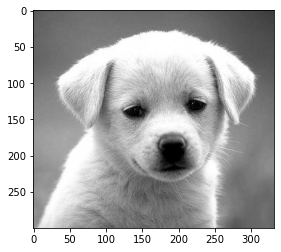

In [10]:
plt.imshow(img_gray,cmap="gray")

In [16]:
u,s,vh=np.linalg.svd(img_gray,full_matrices=False)

In [38]:
np.sum(u**2,axis=1)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.

In [36]:
np.sum(vh**2,axis=1)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.

In [17]:
img_gray.shape,u.shape,s.shape,vh.shape

((300, 332), (300, 300), (300,), (300, 332))

In [25]:
def svd_n_largest(img,n):
    ## n: num of large s.v to pick
    pca=np.zeros_like(img,dtype=np.float32)
    for i in range(0,n):
        pca+=s[i]*np.dot(u[:,i].reshape(-1,1),vh[i,:].reshape(1,-1))
    
    return pca

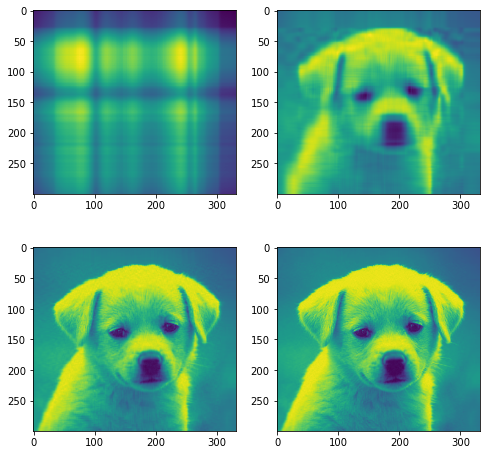

In [33]:
plt.figure(figsize=(8,8))
res1=svd_n_largest(img_gray,1)
plt.subplot(2,2,1)
plt.imshow(res1)
res2=svd_n_largest(img_gray,10)
plt.subplot(2,2,2)
plt.imshow(res2)
res3=svd_n_largest(img_gray,50)
plt.subplot(2,2,3)
plt.imshow(res3)
res4=svd_n_largest(img_gray,100)
plt.subplot(2,2,4)
plt.imshow(res4)

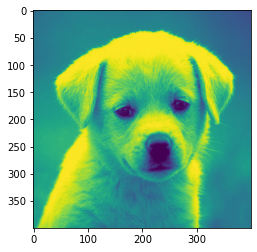

In [46]:
img_gray=cv2.resize(img_gray,(400,400))
plt.imshow(img_gray)

In [47]:
### transform
mean=np.mean(img_gray,axis=0)

In [48]:
img=img_gray-mean
_,v,vc=np.linalg.svd(img)

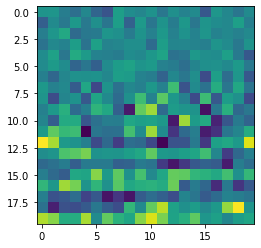

In [49]:
plt.imshow(vc.T[0].reshape(A,20))